<a href="https://colab.research.google.com/github/onlookertozip/Day20180528/blob/master/Level1_1012_%EA%B2%80%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
#그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
#표시 자릿수 지정
%precision 3
#그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

In [0]:
# 나눔고딕 설치

!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

font = fm.FontProperties(fname=fontpath, size=9)

fm._rebuild()

# 그래프에 retina display 적용

%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정

plt.rc('font', family='NanumBarunGothic') 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app


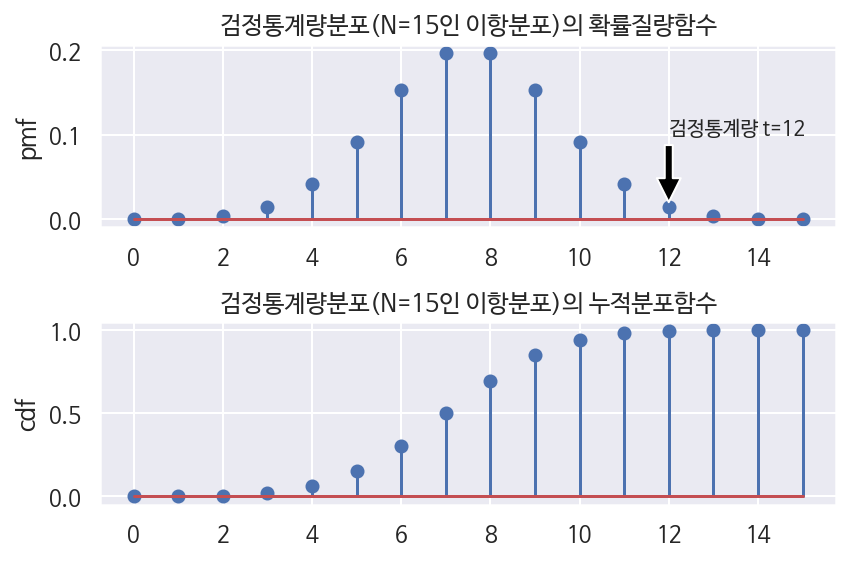

In [0]:
N = 15
mu = 0.5
rv = sp.stats.binom(N, mu)

xx = np.arange(N + 1)

plt.subplot(211)
plt.stem(xx, rv.pmf(xx))
plt.ylabel("pmf")
plt.title("검정통계량분포(N=15인 이항분포)의 확률질량함수")
black = {"facecolor": "black"}
plt.annotate('검정통계량 t=12', xy=(12, 0.02), xytext=(12, 0.1), arrowprops=black)

plt.subplot(212)
plt.stem(xx, rv.cdf(xx))
plt.ylabel("cdf")
plt.title("검정통계량분포(N=15인 이항분포)의 누적분포함수")

plt.tight_layout()
plt.show()

In [0]:
2 * (1 - rv.cdf(12 - 1))

0.035

In [0]:
1 - rv.cdf(12 - 1)

0.018

In [0]:
N = 10
mu_0 = 0.5
np.random.seed(0)
x = sp.stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)
n

7

In [0]:
sp.stats.binom_test(n, N)

0.344

In [0]:
N = 10
K = 4
mu_0 = np.ones(K)/K
np.random.seed(0)
x = np.random.choice(K, N, p=mu_0)
n = np.bincount(x, minlength=K)
n

array([0, 3, 5, 2])

In [0]:
sp.stats.chisquare(n)

Power_divergenceResult(statistic=5.199999999999999, pvalue=0.157724450396663)

In [0]:
obs = np.array([[5, 15], [10, 20]])
sp.stats.chi2_contingency(obs)

(0.099, 0.753, 1, array([[ 6., 14.],
        [ 9., 21.]]))

In [0]:
N = 10
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
x

array([ 1.764,  0.4  ,  0.979,  2.241,  1.868, -0.977,  0.95 , -0.151,
       -0.103,  0.411])

In [0]:
def ztest_1samp(x, sigma2=1, mu=0):
    z = (x.mean() - mu) / np.sqrt(sigma2/len(x))
    return z, 2 * sp.stats.norm().sf(np.abs(z))

ztest_1samp(x)

(2.334, 0.020)

In [0]:
N = 100
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
ztest_1samp(x)

(0.598, 0.550)

In [0]:
N = 10
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
sp.stats.ttest_1samp(x, popmean=0)

Ttest_1sampResult(statistic=2.28943967238967, pvalue=0.04781846490857058)

In [0]:
N = 100
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
sp.stats.ttest_1samp(x, popmean=0)

Ttest_1sampResult(statistic=0.5904283402851698, pvalue=0.5562489158694675)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


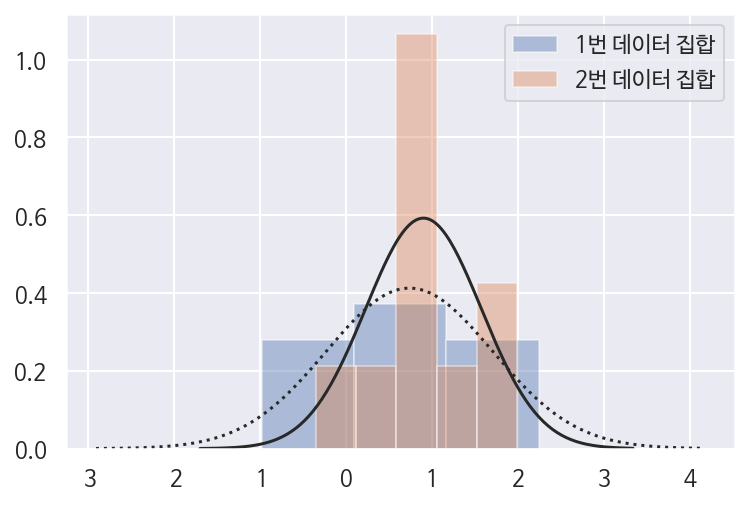

In [0]:
N_1 = 10
mu_1 = 0
sigma_1 = 1
N_2 = 10
mu_2 = 0.5
sigma_2 = 1
np.random.seed(0)
x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)
ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label="1번 데이터 집합")
ax = sns.distplot(x2, kde=False, fit=sp.stats.norm, label="2번 데이터 집합")
ax.lines[0].set_linestyle(":")
plt.legend()
plt.show()

In [0]:
np.mean(x1), np.mean(x2)

(0.738, 0.901)

In [0]:
sp.stats.ttest_ind(x1, x2, equal_var=False)

Ttest_indResult(statistic=-0.4139968526988655, pvalue=0.6843504889824326)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


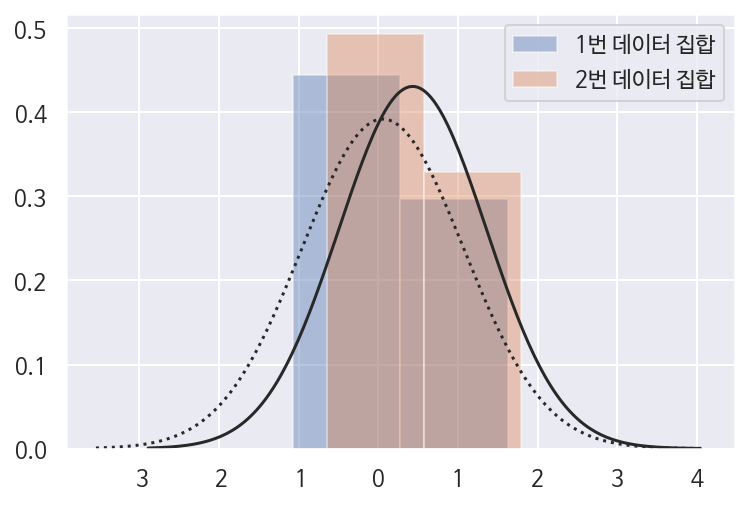

In [0]:
N = 5
mu_1 = 0
mu_2 = 0.4
np.random.seed(1)
x1 = sp.stats.norm(mu_1).rvs(N)
x2 = x1 + sp.stats.norm(mu_2, 0.1).rvs(N)

ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label="1번 데이터 집합")
ax = sns.distplot(x2, kde=False, fit=sp.stats.norm, label="2번 데이터 집합")
ax.lines[0].set_linestyle(":")
plt.legend()
plt.show()

In [0]:
sp.stats.ttest_rel(x1, x2)

Ttest_relResult(statistic=-5.662482449248929, pvalue=0.0047953456833781305)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


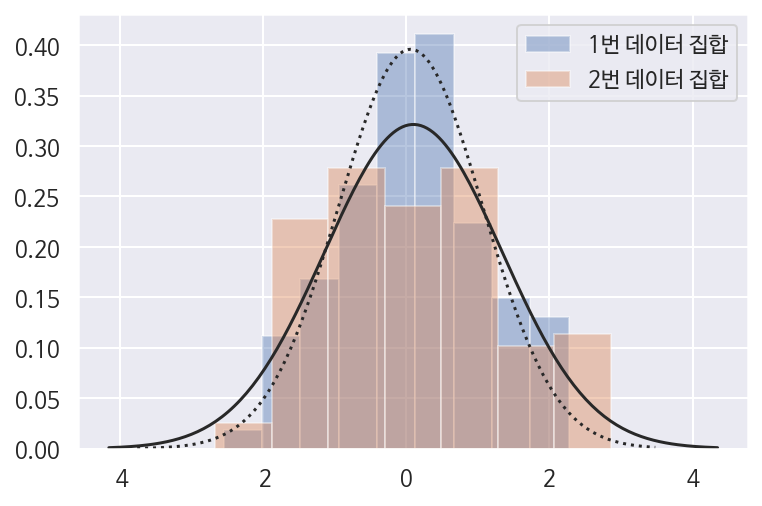

In [0]:
N1 = 100
N2 = 100
sigma_1 = 1
sigma_2 = 1.2
np.random.seed(0)
x1 = sp.stats.norm(0, sigma_1).rvs(N1)
x2 = sp.stats.norm(0, sigma_2).rvs(N2)
ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label="1번 데이터 집합")
ax = sns.distplot(x2, kde=False, fit=sp.stats.norm, label="2번 데이터 집합")
ax.lines[0].set_linestyle(":")
plt.legend()
plt.show()

In [0]:
x1.std(), x2.std()

(1.008, 1.242)

In [0]:
sp.stats.bartlett(x1, x2)

BartlettResult(statistic=4.253473837232266, pvalue=0.039170128783651344)

In [0]:
sp.stats.fligner(x1, x2)

FlignerResult(statistic=7.224841990409457, pvalue=0.007190150106748367)

In [0]:
sp.stats.levene(x1, x2)

LeveneResult(statistic=7.680708947679437, pvalue=0.0061135154970207925)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


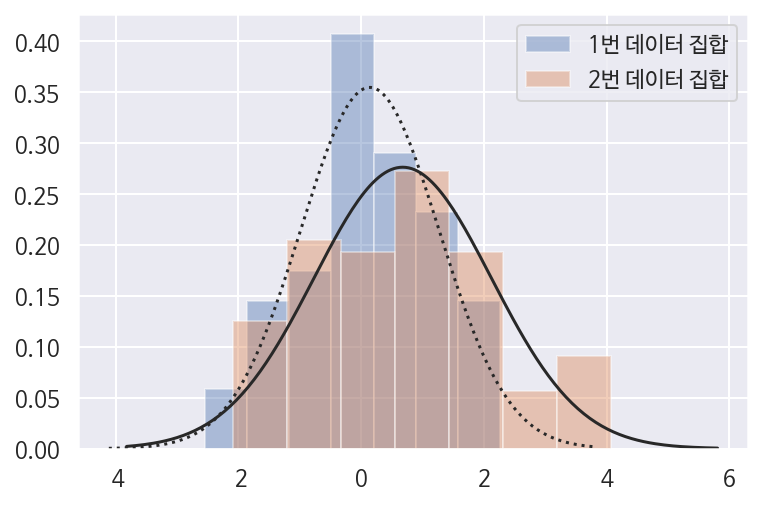

In [0]:
np.random.seed(0)
N1 = 50
N2 = 100
x1 = sp.stats.norm(0, 1).rvs(N1)
x2 = sp.stats.norm(0.5, 1.5).rvs(N2)
ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label="1번 데이터 집합")
ax = sns.distplot(x2, kde=False, fit=sp.stats.norm, label="2번 데이터 집합")
ax.lines[0].set_linestyle(":")
plt.legend()
plt.show()

In [0]:
sp.stats.ks_2samp(x1, x2)

Ks_2sampResult(statistic=0.23, pvalue=0.055507233643215415)

In [0]:
from scipy import stats
x = [1, 2, 3, 4, 5]
y = [2, 3, 6, 7, 9]
stats.mannwhitneyu(x, y)

MannwhitneyuResult(statistic=6.0, pvalue=0.10364992015687058)

In [0]:
from scipy.stats import wilcoxon
x=[6, 8, 14, 16, 23, 24, 28, 29, 41, -48, 49, 56, 60, -67, 75]
w, p = wilcoxon(x)
w, p

(24.0, 0.04088813291185591)

In [0]:
w, p = wilcoxon(x, alternative='greater')
w, p

(96.0, 0.020444066455927955)